In [3]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import cv2

In [4]:
model = YOLO('./saved_model.pt')
model.info()

Model summary: 225 layers, 3,019,233 parameters, 0 gradients, 8.2 GFLOPs


(225, 3019233, 0, 8.2393088)

In [5]:
# Specify the folder containing the images
test_folder = '../../Dataset/GTSRB/Test'


0: 608x640 1 Road work, 41.1ms
Speed: 1.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 1 No passing veh over 3.5 tons, 44.3ms
Speed: 0.9ms preprocess, 44.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 608x640 1 Right-of-way at intersection, 60.0ms
Speed: 1.0ms preprocess, 60.0ms inference, 0.3ms postprocess per image at shape (1, 3, 608, 640)

0: 640x608 1 No entry, 44.4ms
Speed: 0.9ms preprocess, 44.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 608)

0: 640x608 1 Speed limit (120km/h), 39.1ms
Speed: 0.9ms preprocess, 39.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 608)


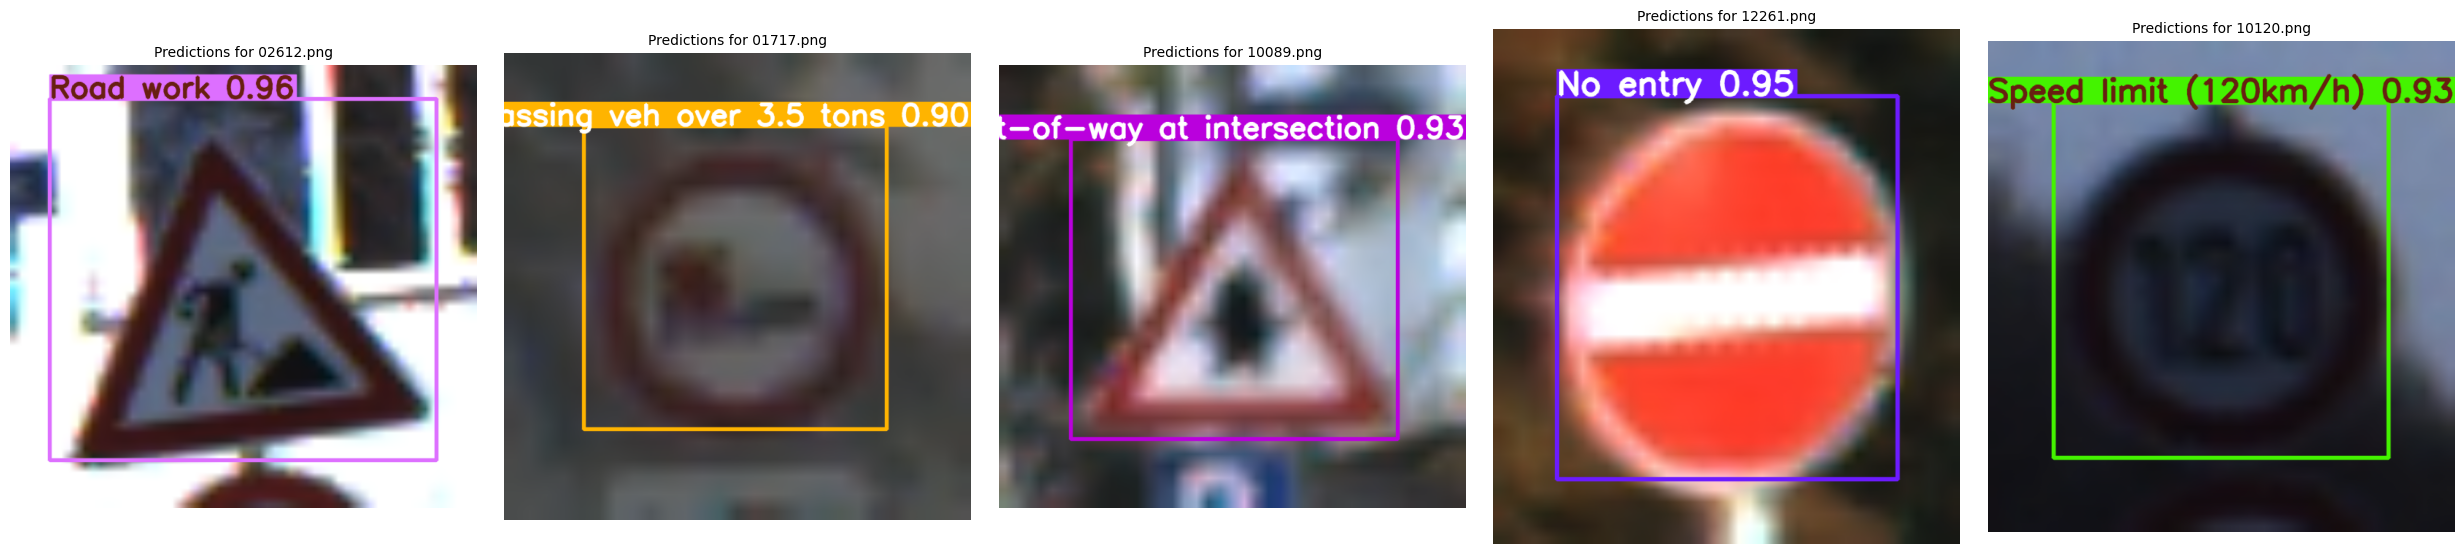

In [6]:
# Get a list of all image files in the test folder
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Create a figure for plotting
fig, axes = plt.subplots(1, len(selected_images), figsize=(25, 10))  # Adjust size for clarity

for i, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(test_folder, image_file)
    image = cv2.imread(image_path)
    
    # Resize the image while maintaining aspect ratio
    height, width = image.shape[:2]
    max_dim = max(height, width)
    scale_factor = 640 / max_dim  # Standard YOLO input size
    new_size = (int(width * scale_factor), int(height * scale_factor))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
    
    # Perform prediction
    results = model(resized_image)
    
    # Annotate the image with the model's predictions
    annotated_image = results[0].plot(line_width=4)  # Adjust font size and line width
    
    # Display the image in the console
    axes[i].imshow(annotated_image)
    axes[i].set_title(f"Predictions for {image_file}", fontsize=10)  # Adjust title font size
    axes[i].axis("off")

plt.tight_layout(pad=2.0)  # Add padding for better spacing
plt.show()
